# Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('D:\practice\car\quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.shape

(892, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Renaming columns

In [5]:
df.rename(mapper={
        'name':'Name',
        'company':'Company',
        'year':'Year',
        'kms_driven':'km'
        },axis=1, inplace=True)

# Replacing NAN values

In [6]:
df['Name'].replace(np.NaN,df['Name'].value_counts().idxmax(),inplace=True)

In [7]:
df['Company'].replace(np.NaN,df['Company'].value_counts().idxmax(),inplace=True)

In [8]:
df['Year'].replace(np.NaN,df['Year'].value_counts().idxmax(),inplace=True)

In [9]:
df['km'].replace(np.NaN,df['km'].value_counts().idxmax(),inplace=True)

In [10]:
df['fuel_type'].replace(np.NaN,df['fuel_type'].value_counts().idxmax(),inplace=True)

In [11]:
df.isnull().sum()

Name         0
Company      0
Year         0
Price        0
km           0
fuel_type    0
dtype: int64

# Data cleaning

# Price

In [12]:
df=df[df['Price']!='Ask For Price']

In [13]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [14]:
df['km']=df['km'].str.split().str.get(0).str.replace(',','')

# Year

In [15]:
df=df[df['Year'].str.isnumeric()]


In [16]:
df['Year']=df['Year'].astype(int)
df

,Name,Company,Year,Price,km,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,Petrol


# Fuel_type

In [17]:
df=df[df['km'].str.isnumeric()]

In [18]:
df['km']=df['km'].astype(int)

In [19]:
df=df[~df['fuel_type'].isna()]

In [20]:
df.shape

(817, 6)

In [21]:
df['Name']=df['Name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [22]:
df=df.reset_index(drop=True)

In [23]:
df

,Name,Company,Year,Price,km,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [24]:
df.to_csv('Cleaned_Car_data.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       817 non-null    object
 1   Company    817 non-null    object
 2   Year       817 non-null    int32 
 3   Price      817 non-null    int32 
 4   km         817 non-null    int32 
 5   fuel_type  817 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.9+ KB


In [26]:
df.describe(include='all')

,Name,Company,Year,Price,km,fuel_type
count,817,817,817.000000,8.170000e+02,817.000000,817
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,429
mean,NaN,NaN,2012.440636,4.115503e+05,46250.714810,NaN
std,NaN,NaN,4.002354,4.749173e+05,34283.745254,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56758.000000,NaN


# Categorical Column

In [27]:
data_cat = df.select_dtypes(np.object_)
data_cat

,Name,Company,fuel_type
0,Hyundai Santro Xing,Hyundai,Petrol
1,Mahindra Jeep CL550,Mahindra,Diesel
2,Hyundai Grand i10,Hyundai,Petrol
3,Ford EcoSport Titanium,Ford,Diesel
4,Ford Figo,Ford,Diesel
...,...,...,...
812,Maruti Suzuki Ritz,Maruti,Petrol
813,Tata Indica V2,Tata,Diesel
814,Toyota Corolla Altis,Toyota,Petrol
815,Tata Zest XM,Tata,Diesel


In [28]:
data_num = df.select_dtypes(np.number)
data_num

,Year,Price,km
0,2007,80000,45000
1,2006,425000,40
2,2014,325000,28000
3,2014,575000,36000
4,2012,175000,41000
...,...,...,...
812,2011,270000,50000
813,2009,110000,30000
814,2009,300000,132000
815,2018,260000,27000


In [29]:
df['Company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

# Company Price

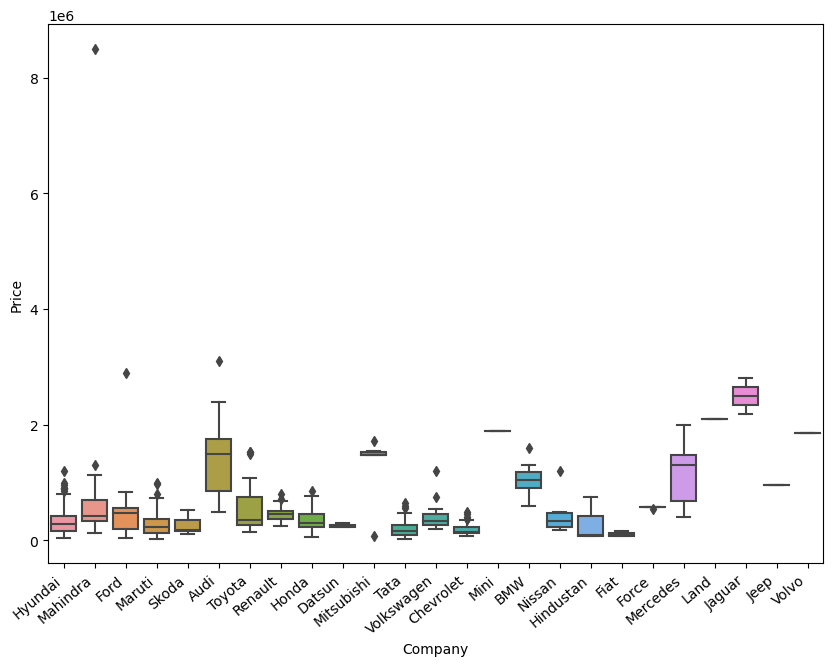

In [30]:
plt.subplots(figsize=(10,7))
ax=sns.boxplot(x='Company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Price Year

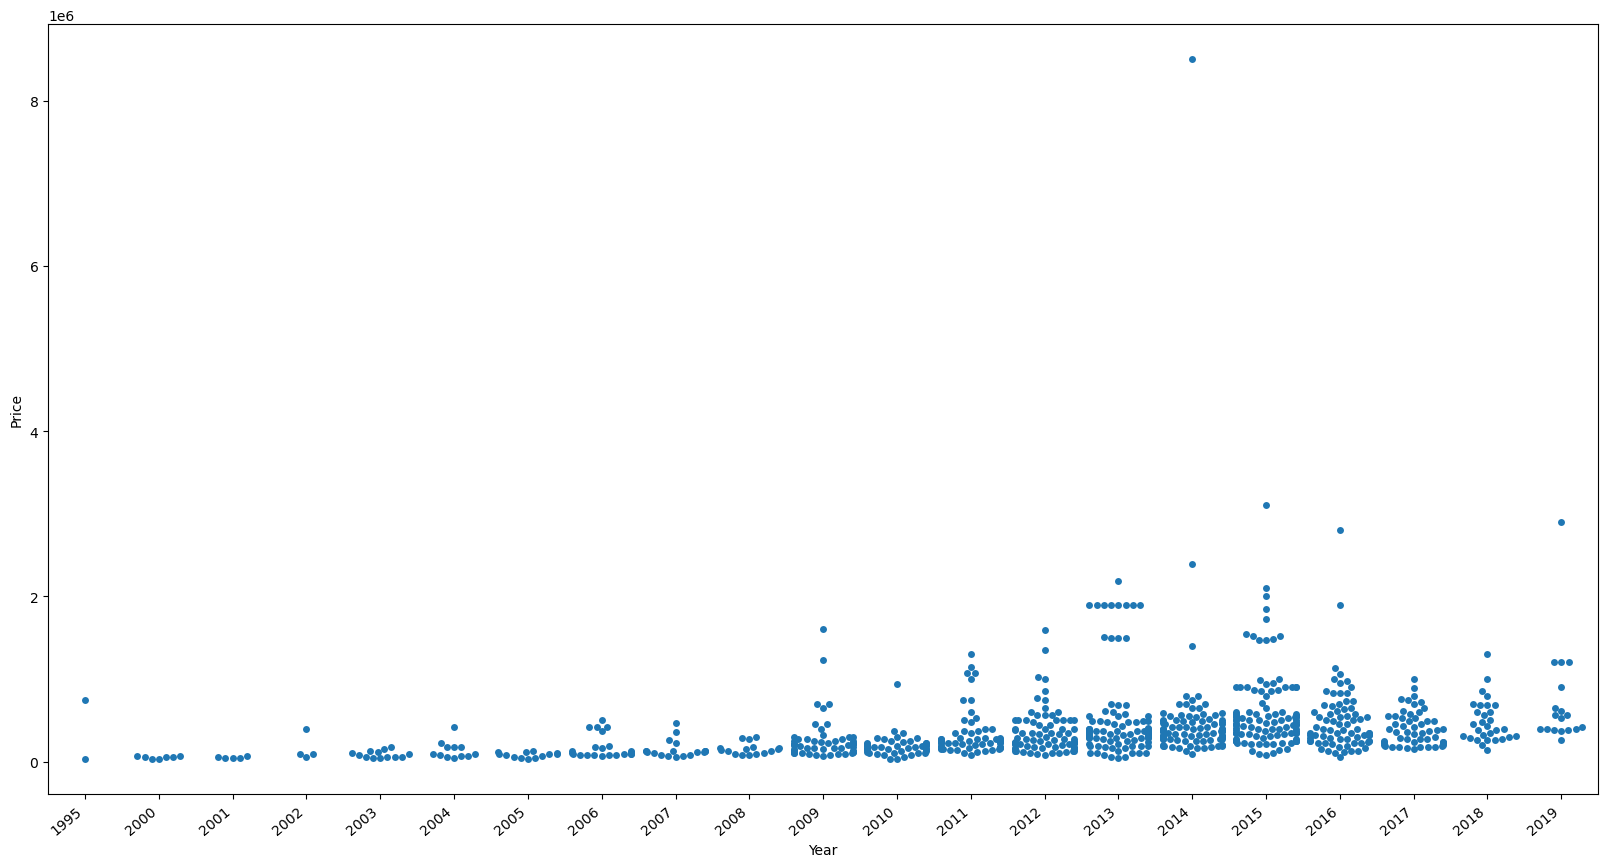

In [31]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Time series

Text(0, 0.5, 'Price')

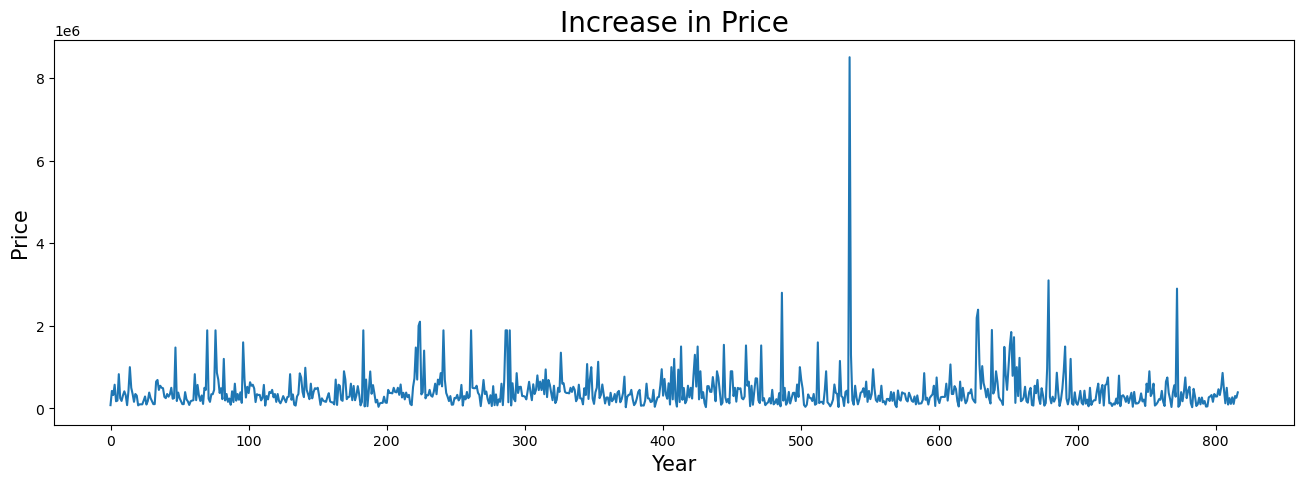

In [32]:
import datetime as dt
fig=plt.subplots(figsize=(16,5))
plt.plot(df.index,df['Price'])
plt.title('Increase in Price', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)



# Price KM

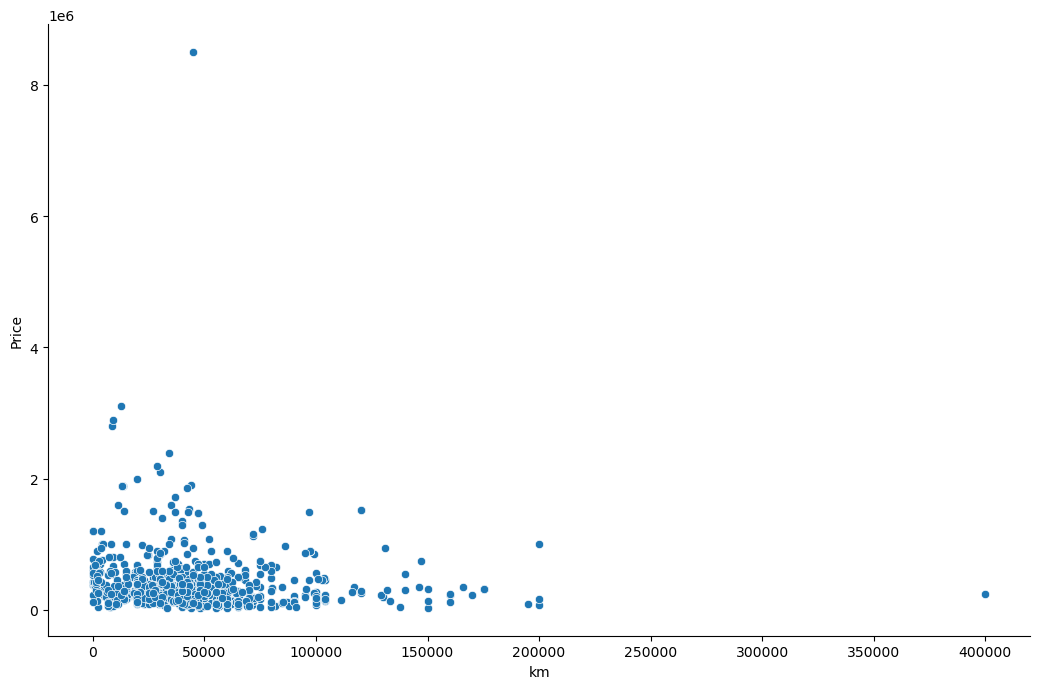

In [33]:
sns.relplot(x='km',y='Price',data=df,height=7,aspect=1.5)

# Price Fuel type

<Axes: xlabel='fuel_type', ylabel='Price'>

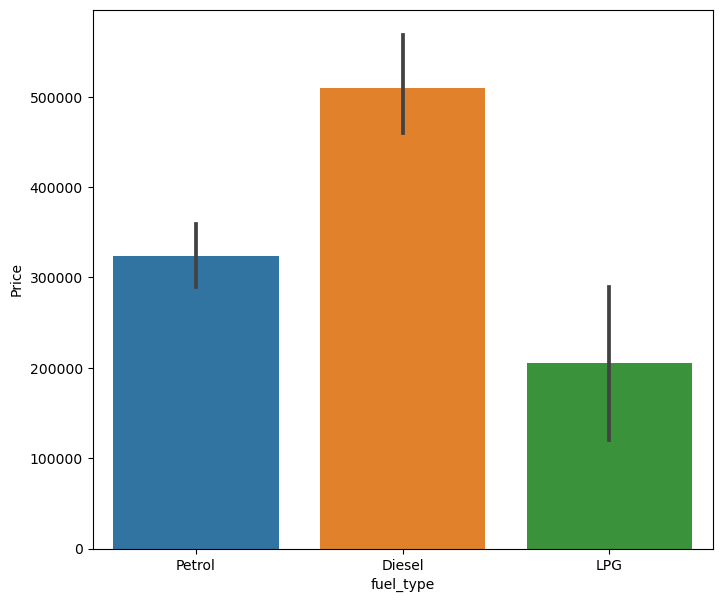

In [34]:
plt.subplots(figsize=(8,7))
sns.barplot(x='fuel_type',y='Price',data=df)

# Price Company

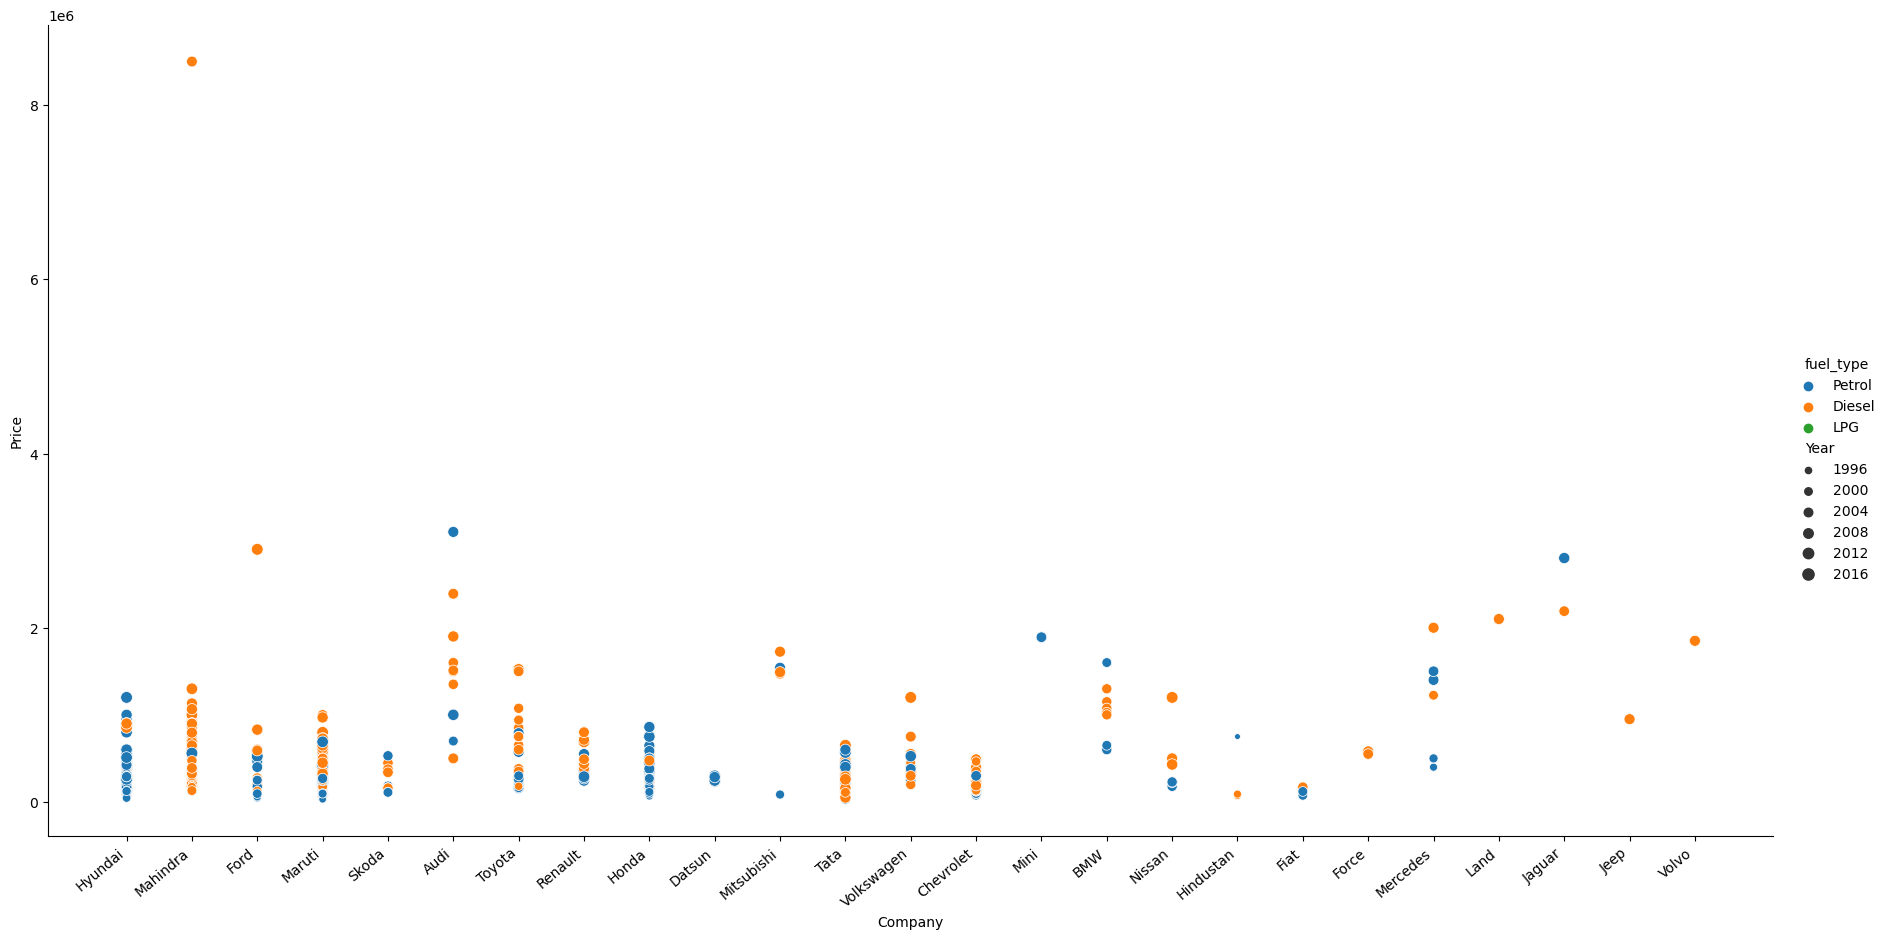

In [35]:
ax=sns.relplot(x='Company',y='Price',data=df,hue='fuel_type',size='Year',height=9,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [36]:
X=df[['Name','Company','Year','km','fuel_type']]
y=df['Price']

In [37]:
X

,Name,Company,Year,km,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
813,Tata Indica V2,Tata,2009,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,132000,Petrol
815,Tata Zest XM,Tata,2018,27000,Diesel


In [38]:
y.shape

(817,)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [42]:
ohe=OneHotEncoder()
ohe.fit(X[['Name','Company','fuel_type']])

OneHotEncoder()

In [43]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Company','fuel_type']),
                                    remainder='passthrough')

In [44]:
linear=LinearRegression()

In [45]:
pipe=make_pipeline(column_trans,linear)

In [46]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['Name', 'Company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [47]:
y_pred=pipe.predict(X_test)

In [48]:
r2_score(y_test,y_pred)

0.4987177886138303

In [49]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    linear=LinearRegression()
    pipe=make_pipeline(column_trans,linear)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [50]:
np.argmax(scores)

39

In [51]:
scores[np.argmax(scores)]

0.8678588698617524

In [52]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([439241.82544026])

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
linear=LinearRegression()
pipe=make_pipeline(column_trans,linear)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8678588698617524

In [54]:
import pickle

In [55]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [56]:
pipe.predict(pd.DataFrame(columns=['Name','Company','Year','km','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430491.18448029])

In [57]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [58]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.8678588698617524, 25910433210.90606)

<Axes: xlabel='Price', ylabel='Price'>

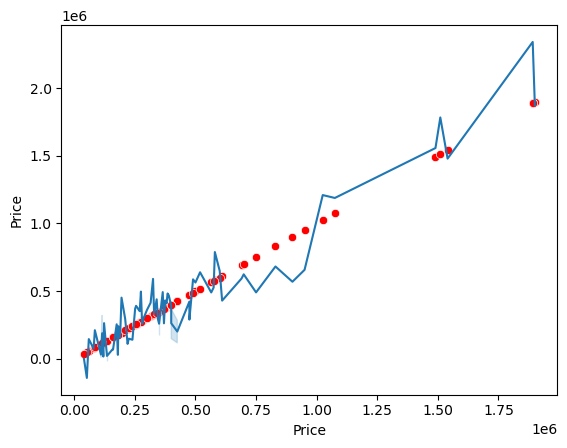

In [59]:
sns.scatterplot(x=y_test, y=y_test, c = 'red')
sns.lineplot(x=y_test,y=y_pred)

In [60]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
73,344999,294750.416958,50248.583042
597,60000,146461.018899,-86461.018899
567,385000,483247.259479,-98247.259479
13,425000,118438.316700,306561.683300
368,425000,252754.755689,172245.244311
...,...,...,...
219,519000,639702.372407,-120702.372407
503,40000,1968.888720,38031.111280
514,159000,73037.813909,85962.186091
180,340000,440074.126929,-100074.126929
